<h2 align=center>InfoViz MET Data with Seaborn and Python (Part 1)</h2>

### Libraries

In [1]:
import numpy as np
import pandas as pd
#pd.set_option('max_columns', None)
pd.options.display.width = 0
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')
import datetime
from scipy import stats
from scipy.sparse import hstack, csr_matrix
from sklearn.model_selection import train_test_split, KFold
from wordcloud import WordCloud
from collections import Counter
from nltk.corpus import stopwords
from nltk.util import ngrams
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.preprocessing import StandardScaler
import nltk
nltk.download('stopwords')
stop = set(stopwords.words('english'))
import os
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import json
import ast
from urllib.request import urlopen
from PIL import Image

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aligh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Task 1: Data Loading and Exploration

In [2]:
#ita_data=pd.read_csv('italianData.csv')
ita_data=pd.read_csv("E:\\GitHub\\infoviz\\data_management\\transfers.csv")
ita_data.head(3)

,Unnamed: 0.1,Unnamed: 0,Object Number,Is Highlight,Is Timeline Work,Is Public Domain,Object ID,Gallery Number,Department,AccessionYear,...,Link Resource,Object Wikidata URL,Metadata Date,Repository,Tags,Tags AAT URL,Tags Wikidata URL,lastTransfer,agentsTransfer,lastDealer
0,0,0,1985.5,0,0,1,435573,NaN,European Paintings,1985.0,...,http://www.metmuseum.org/art/collection/search...,https://www.wikidata.org/wiki/Q19912099,NaN,"Metropolitan Museum of Art, New York, NY",Goddess|Putti|Flowers|Landscapes,http://vocab.getty.edu/page/aat/300343852|http...,https://www.wikidata.org/wiki/Q205985|https://...,Purchase,Rudolph and Lentilhon G. von Fluegge Foundatio...,Rudolph and Lentilhon G. von Fluegge Foundatio...
1,1,1,12.6,0,0,1,435574,NaN,European Paintings,1912.0,...,http://www.metmuseum.org/art/collection/search...,https://www.wikidata.org/wiki/Q19905919,NaN,"Metropolitan Museum of Art, New York, NY",Soldiers|Men|Crucifixion|Horses|Mountains|Ange...,http://vocab.getty.edu/page/aat/300185678|http...,https://www.wikidata.org/wiki/Q4991371|https:/...,Purchase,Rogers Fund,Rogers Fund
2,2,2,42.53.2,0,0,1,435575,NaN,European Paintings,1942.0,...,http://www.metmuseum.org/art/collection/search...,https://www.wikidata.org/wiki/Q19913805,NaN,"Metropolitan Museum of Art, New York, NY",Kings|Men|Portraits,http://vocab.getty.edu/page/aat/300025481|http...,https://www.wikidata.org/wiki/Q12097|https://w...,Gift,Helen O. Brice,Helen O. Brice


### Task 2: Visualizing the Target Distribution

C:\Users\aligh\AppData\Local\Temp\ipykernel_22204\232986369.py:2: MatplotlibDeprecationWarning:

Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.

E:\DHDK\datascience-in-dataspell\datascience-in-dataspell\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



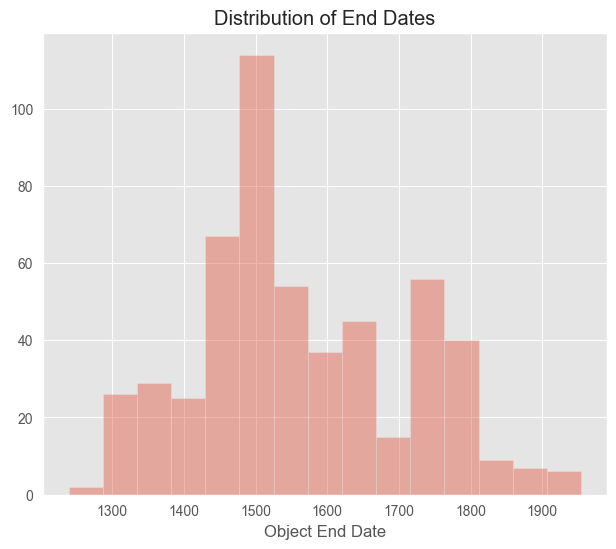

In [3]:
fig, ax = plt.subplots(figsize=(16, 6))
plt.subplot(1, 2, 1)
sns.distplot(ita_data['Object End Date'], kde=False);
plt.title('Distribution of End Dates');
# plt.subplot(1, 2, 2)
# sns.distplot(np.log1p(ita_data['Object End Date']), kde = False)
# plt.title('Distribution of Log-transformed End Dates')

In [12]:
#ita_data['log_enddate'] = np.log1p(ita_data['Object End Date'])

C:\Users\aligh\AppData\Local\Temp\ipykernel_22204\3534971459.py:2: MatplotlibDeprecationWarning:

Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.



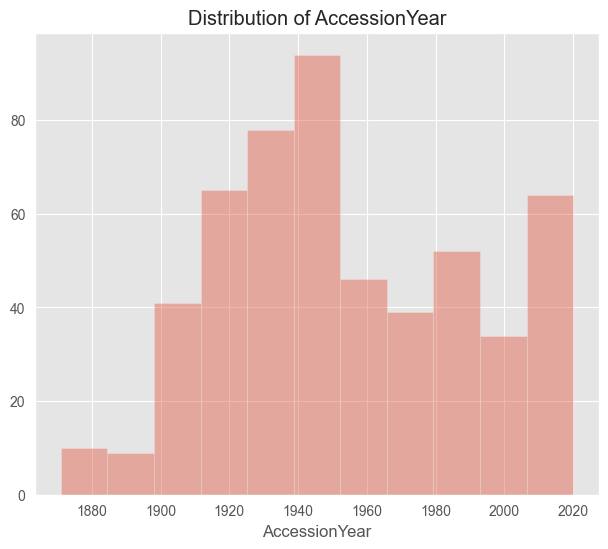

In [4]:
fig, ax = plt.subplots(figsize=(16, 6))
plt.subplot(1, 2, 1)
sns.distplot(ita_data['AccessionYear'], kde=False);
plt.title('Distribution of AccessionYear');
# plt.subplot(1, 2, 2)
# sns.distplot(np.log1p(ita_data['AccessionYear']), kde = False)
# plt.title('Distribution of Log-transformed AccessionYear')

In [5]:
# fig, ax = plt.subplots(figsize=(16, 6))
# plt.subplot(1, 2, 1)
# sns.distplot(ita_data['Medium'], kde=False);
# plt.title('Distribution of End Dates');
# # plt.subplot(1, 2, 2)
# # sns.distplot(np.log1p(ita_data['Medium']), kde = False)
# # plt.title('Distribution of Log-transformed')

#####  DistPlot could not convert string, for example 'Oil on canvas', to float.
#####  Maybe we can create a numerical label list for the column 'Medium'

### Task 5: Distribution of Type of Transfer in Paintings

In [6]:
medium_data = ita_data.loc[ita_data['lastTransfer'].isin(ita_data['lastTransfer'].value_counts().head(10).index)]


Text(0.5, 1.0, 'Mean TransferType of Paintings per Accession Year')

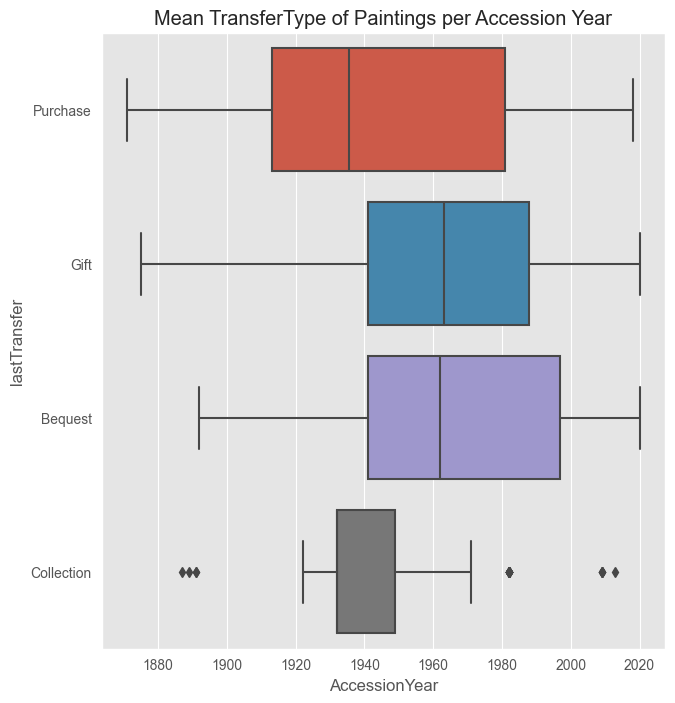

In [9]:
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
sns.boxplot(x='AccessionYear', y='lastTransfer', data=medium_data)
plt.title('Mean TransferType of Paintings per Accession Year')

### Task 6: Frequent Titles in Paintings

In [36]:
fav_tags=ita_data.loc[ita_data['lastDealer'].isin(['Rogers Fund',
                                'Gwynne Andrews Fund',
                                'George Blumenthal',
                                'Michael Friedsam',
                                'Theodore M. Davis',
                                'The Jules Bache Collection',
                                'The Jack and Belle Linsky Collection',
                                'J. Pierpont Morgan',
                                'Mrs. Charles Wrightsman',
                                'Maitland F. Griggs',
                                'Grace Rainey Rogers',
                                'Benjamin Altman'])]

In [37]:
# copy_ita_data=ita_data.copy()
fav_tags = fav_tags[fav_tags['Tags'].notnull()]
# tags_list=[]
# for i in range(len(copy_ita_data)):
#     string_it=copy_ita_data.Tags.iloc[i].split('|')
#     string_it=copy_ita_data.Tags.iloc[i].split(' and ')
#     ' '.join(string_it)
#     copy_ita_data.Tags.iloc[i]=' '.join(string_it)

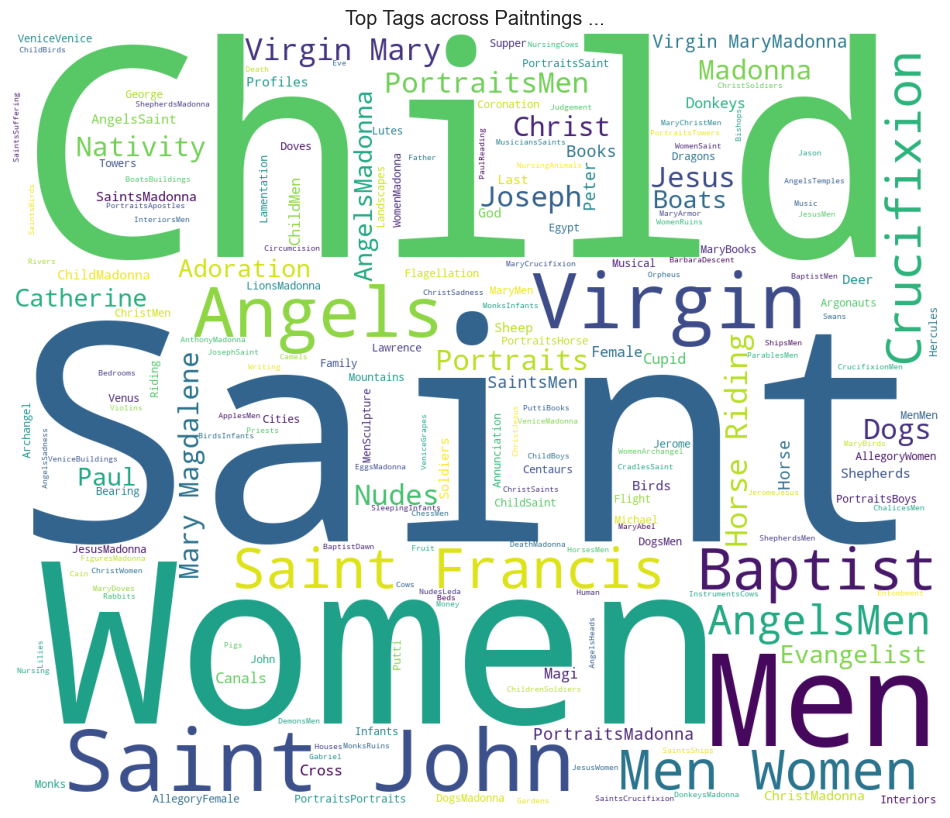

In [38]:
plt.figure(figsize=(12, 12))
text = ''.join(fav_tags['Tags'].values)
wordcloud = WordCloud(max_font_size=None,
                      background_color='white',
                      width=1200, height=1000).generate(text)
plt.imshow(wordcloud)
plt.title('Top Tags across Paitntings ...')
plt.axis('off')
plt.show()

In [40]:
fav_artist_df=ita_data.loc[ita_data['Artist Display Name'].isin(['Giovanni Battista Tiepolo',
                                                        'Lorenzo Monaco (Piero di Giovanni)',
                                                        'Bernardo Daddi',
                                                        'Giovanni di Paolo (Giovanni di Paolo di Grazia)',
                                                        'Martino di Bartolommeo di Biagio',
                                                        'Titian (Tiziano Vecellio)',
                                                        'Francesco Guardi',
                                                        'Garofalo (Benvenuto Tisi da Garofalo)',
                                                        'Canaletto (Giovanni Antonio Canal)',
                                                        'Simone Martini',
                                                        'Giovanni Battista Tiepolo',
                                                        'Titian (Tiziano Vecellio)'])]

E:\DHDK\datascience-in-dataspell\datascience-in-dataspell\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



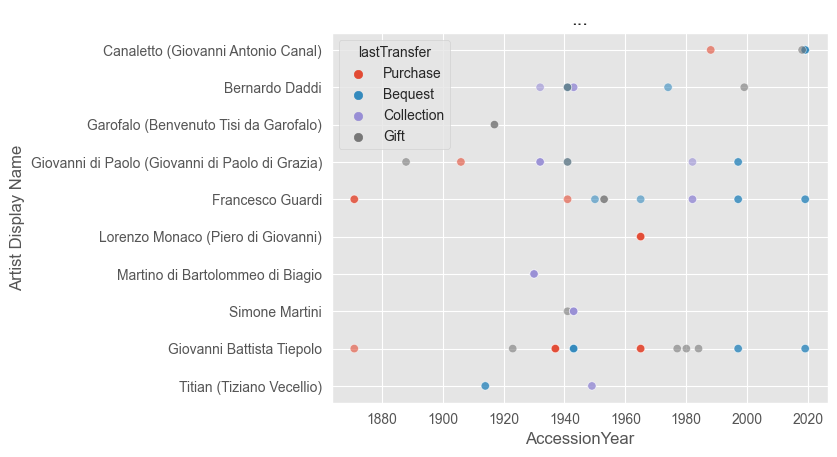

In [41]:

plt.figure()
sns.scatterplot(fav_artist_df['AccessionYear'], fav_artist_df['Artist Display Name'],hue=fav_artist_df['lastTransfer'] ,alpha=0.6)
plt.title("...")
plt.show()

In [47]:
# subset_final = fav_artist_df[['Artist Display Name', 'Object End Date' ,'AccessionYear', 'lastTransfer', 'agentsTransfer']]


##### Label encoding the variables before doing a pairplot because pairplot ignores strings


In [ ]:
# import copy
# from sklearn.preprocessing import LabelEncoder
#
# sub_df_encoded = copy.deepcopy(subset_final)
# sub_df_encoded.loc[:,['Artist Display Name', 'Object End Date' ,'AccessionYear','lastTransfer', 'agentsTransfer']] = sub_df_encoded.loc[:,['Artist Display Name', 'Object End Date' ,'AccessionYear', 'lastTransfer', 'agentsTransfer']].apply(LabelEncoder().fit_transform)
#
# sns.pairplot(sub_df_encoded)  #pairplot
# plt.show()